# Pymaceuticals Inc.
---

### Analysis
1. Capomulin and Ramicane were highly effective drug regimens. These two drugs had the lowest tumor volumn: mean, variance, standard deviation, and standard deviation error. As a result, Ramicane is the most similar to Capomulin and may be a substitute to Capomulin.
2. Based on the line plot, *Capomulin treatement of mouse l509*, there was a slight increase in tumor volume during the first 20 days. Then from days 20 to 40, there was a sharp decline in tumor volume. 
3. For Capomulin, there is a high positive correlation between mouse weight and tumor volume with 0.84.


In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_combined = study_results.merge(mouse_metadata, on='Mouse ID', how='left')


# Display the data table for preview
mouse_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = mouse_combined['Mouse ID'].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dupe = mouse_combined[mouse_combined.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
mice_dupe = mice_dupe['Mouse ID'].unique()
mice_dupe

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_combined.loc[mouse_combined['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_combined_clean = mouse_combined.loc[mouse_combined['Mouse ID']!='g989']
mouse_combined_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = mouse_combined_clean['Mouse ID'].nunique()
mice_count_clean

248

## Summary Statistics

In [7]:
# Summary Statistics for Tumor Volume by Drug Regimen without Agg Method
drug_group = mouse_combined_clean.groupby(['Drug Regimen'])
meanTV = drug_group['Tumor Volume (mm3)'].mean()
medianTV = drug_group['Tumor Volume (mm3)'].median()
varianceTV = drug_group['Tumor Volume (mm3)'].var()
stdTV = drug_group['Tumor Volume (mm3)'].std()
semTV = drug_group['Tumor Volume (mm3)'].sem()
TV_dict = {"Mean Tumor Volume":meanTV,
                     "Median Tumor Volume":medianTV,
                     "Tumor Volume Variance":varianceTV,
                     "Tumor Volume Std. Dev.":stdTV,
                     "Tumor Volume Std. Err.":semTV}
TV_df = pd.DataFrame(TV_dict)
TV_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Summary Statistics for Tumor Volume by Drug Regimen with Agg Method
TV_byDrug_summary = mouse_combined_clean.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
TV_byDrug_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

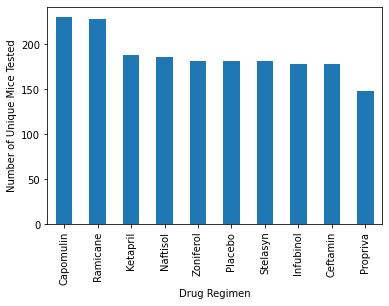

In [9]:
# Bar Chart for Total Number of Unique Mice Tested by Drug Using Pandas
x_labels = ["Capomulin",'Ramicane','Ketapril','Naftisol','Zoniferol',
            'Placebo','Stelasyn','Infubinol','Ceftamin','Propriva']
unique_mice_by_drug = mouse_combined_clean.groupby(['Drug Regimen'])['Mouse ID'].count().reindex(x_labels)
unique_mice_by_drug.plot(kind='bar', ylabel="Number of Unique Mice Tested")
plt.show()

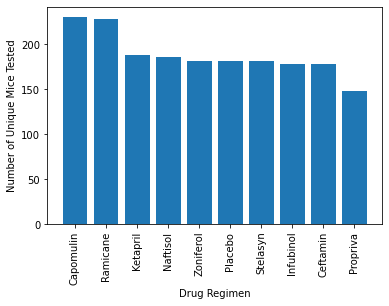

In [10]:
# Bar Chart for Total Number of Unique Mice Tested by Drug Using PyPlot
x_labels = ["Capomulin",'Ramicane','Ketapril','Naftisol','Zoniferol',
            'Placebo','Stelasyn','Infubinol','Ceftamin','Propriva']
unique_mice_by_drug = mouse_combined_clean.groupby(['Drug Regimen'])['Mouse ID'].count().reindex(x_labels).to_frame()
x = x_labels
y = unique_mice_by_drug['Mouse ID']
plt.bar(x, y, align='center')
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()

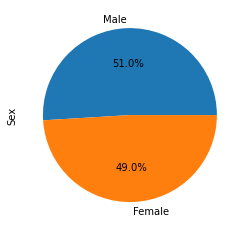

In [11]:
# Pie Plot of Female vs. Male Mice Using Pandas
pie_labels = ['Male','Female']
mice_by_sex = mouse_combined_clean.groupby(['Sex'])['Sex'].count().reindex(pie_labels)
mice_by_sex.plot(kind='pie',autopct="%1.1f%%")
plt.show()

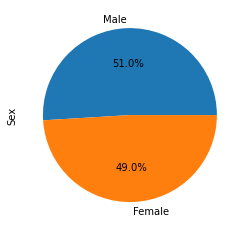

In [12]:
# Pie Plot of Female vs. Male Mice Using PyPlot
pie_labels = ['Male','Female']
mice_by_sex = mouse_combined_clean.groupby(['Sex'])['Sex'].count().reindex(pie_labels).to_frame()
sizes = mice_by_sex['Sex']
plt.pie(sizes, labels=pie_labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Final Tumor Volume of Each Mouse
final_timepoint_df = mouse_combined.groupby(['Mouse ID'])['Timepoint'].max().to_frame().rename(columns={'Timepoint':'Final Timepoint'}).reset_index()
final_timepoint_combined = mouse_combined.merge(final_timepoint_df,on='Mouse ID',how='left')

In [14]:
# Create tumor_vol_list for Box Plot
final_timepoint_cleaned = final_timepoint_combined.loc[(final_timepoint_combined['Final Timepoint']==final_timepoint_combined['Timepoint'])]
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = []
for drug in treatment_list:
    subset = final_timepoint_cleaned.loc[final_timepoint_cleaned['Drug Regimen']==drug]
    subset_value = subset['Tumor Volume (mm3)'].sort_values().reset_index(drop=True)
    tumor_vol_list.append(subset_value)
    quartiles = subset_value.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_list = []
    outliers_subset = subset.loc[(subset['Tumor Volume (mm3)']<lower_bound)|(subset['Tumor Volume (mm3)']>upper_bound)]
    outliers_list.append(outliers_subset['Tumor Volume (mm3)'].sort_values().reset_index(drop=True))
    print(f"{drug}'s potential outliers: {outliers_list}")

Capomulin's potential outliers: [Series([], Name: Tumor Volume (mm3), dtype: float64)]
Ramicane's potential outliers: [Series([], Name: Tumor Volume (mm3), dtype: float64)]
Infubinol's potential outliers: [0    36.321346
Name: Tumor Volume (mm3), dtype: float64]
Ceftamin's potential outliers: [Series([], Name: Tumor Volume (mm3), dtype: float64)]


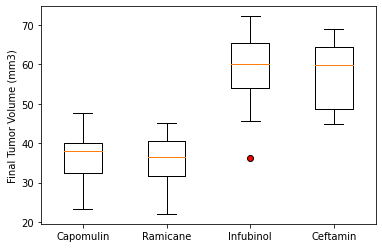

In [15]:
# Final Volume Box Plot by Treatment Drug
data = tumor_vol_list
fig, ax = plt.subplots()
props = dict(markerfacecolor='r', marker='o')
ax.boxplot(data,flierprops=props)
plt.xticks([1,2,3,4],treatment_list)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

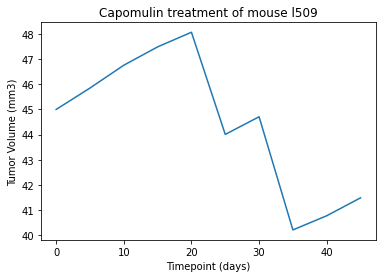

In [34]:
# Line Plot of Tumor Volume vs. Time Point for Mouse L509 Treated with Capomulin
capomulin = mouse_combined_clean.loc[mouse_combined_clean['Drug Regimen']=='Capomulin']
l509 = capomulin.loc[capomulin['Mouse ID']=='l509']
y = l509['Tumor Volume (mm3)']
x = l509['Timepoint']
plt.plot(x,y)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

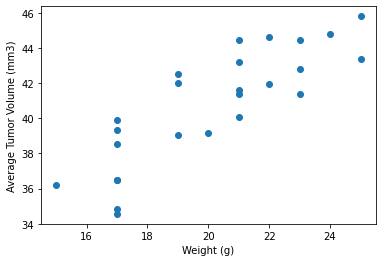

In [39]:
# Scatter plot of Average Tumor Volumn vs. Mouse Weight for the Capomulin Regimen
miceGroup = capomulin.groupby(['Mouse ID'])
x = miceGroup['Weight (g)'].mean()
y = miceGroup['Tumor Volume (mm3)'].mean()
plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


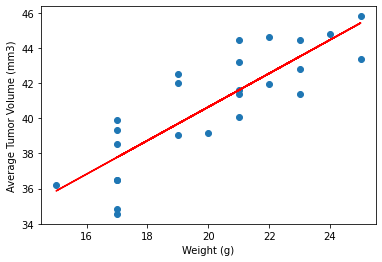

In [54]:
# Correlation of mouse weight and average tumor volumeand Linear Regression Model
miceGroup = capomulin.groupby(['Mouse ID'])
x = miceGroup['Weight (g)'].mean()
y = miceGroup['Tumor Volume (mm3)'].mean()
corr = round(x.corr(y),2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
regress_values = x * slope + intercept
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()